In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
#from sklearn.metrics import r2_score
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.animation as animation # animation
import imageio 
import sys
import fiona
import rasterio
import rasterio.transform
import rasterio.mask
from fiona import Feature, Geometry
from shapely.geometry import mapping, shape
import os
import functions
import fiona
from shapely.geometry import shape
import importlib
from functions import read_shapefile
import numpy as np
from scipy.interpolate import RegularGridInterpolator
from scipy.interpolate import griddata

In [2]:
ice_mask = '/Users/francesco/Desktop/ice_mask.npy'

#open the ice mask
ice_mask = np.load(ice_mask, allow_pickle=True)
ice_mask = pd.DataFrame(ice_mask)

region_id = 24
#ice_mask = ice_mask.loc[region_id]

print('The shape of the ice mask is:', ice_mask.shape)
shape_file = '/Users/francesco/Desktop/squares.shp.gpkg'
df = read_shapefile(shape_file, region_id)



The shape of the ice mask is: (28, 12)


In [3]:
df.index

Int64Index([24], dtype='int64')

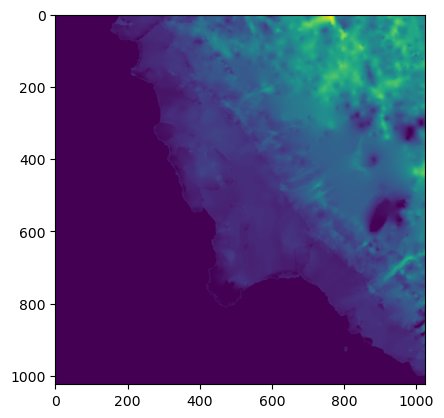

In [27]:
thickness = '/Users/francesco/Desktop/thickness_region_1.npy'
common_years = np.arange(2005,2017,1)

 
id = [1]
thickness = np.load(thickness, allow_pickle=True)
thickness = pd.DataFrame(thickness, index = id, columns = common_years)

plt.imshow(thickness.loc[1, 2007])

In [28]:
masks = '/Users/francesco/Desktop/ice_mask.npy'

id = np.arange(1,29,1)


masks = np.load(masks, allow_pickle=True)
masks = pd.DataFrame(masks, index = id, columns = common_years)

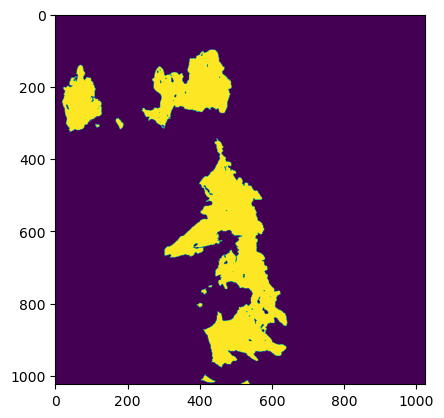

In [54]:
plt.imshow(masks.loc[24, 2007])

In [23]:
path_to_velocity = '/Users/francesco/Desktop/v_region_1.npy'

velocity = np.load(path_to_velocity, allow_pickle=True)
velocity = pd.DataFrame(velocity, index = id, columns = common_years)

In [ ]:
path_to_sic = '/Users/francesco/Desktop/used_2/seaice_conc_monthly_sh_200501.tif'

In [36]:
import os

# Define the root directory
root = '/Users/francesco/Desktop/Thesis/Data/monthly/used_2/'


# Define the list of files
list_of_files = []
common_years = np.arange(2005,2017,1)

# Loop through the years and months to generate filenames
for year in range(2005, 2017):
    for month in range(1, 13):
        # Pad single-digit months with a leading zero
        padded_month = f"{month:02d}"
        # Generate the filename and add it to the list
        filename = f"{root}seaice_conc_monthly_sh_{year}{padded_month}.tif"
        list_of_files.append(filename)

# Print the list of files
print("List of files:")
for file in list_of_files:
    print(file)



List of files:
/Users/francesco/Desktop/Thesis/Data/monthly/used_2/seaice_conc_monthly_sh_200501.tif
/Users/francesco/Desktop/Thesis/Data/monthly/used_2/seaice_conc_monthly_sh_200502.tif
/Users/francesco/Desktop/Thesis/Data/monthly/used_2/seaice_conc_monthly_sh_200503.tif
/Users/francesco/Desktop/Thesis/Data/monthly/used_2/seaice_conc_monthly_sh_200504.tif
/Users/francesco/Desktop/Thesis/Data/monthly/used_2/seaice_conc_monthly_sh_200505.tif
/Users/francesco/Desktop/Thesis/Data/monthly/used_2/seaice_conc_monthly_sh_200506.tif
/Users/francesco/Desktop/Thesis/Data/monthly/used_2/seaice_conc_monthly_sh_200507.tif
/Users/francesco/Desktop/Thesis/Data/monthly/used_2/seaice_conc_monthly_sh_200508.tif
/Users/francesco/Desktop/Thesis/Data/monthly/used_2/seaice_conc_monthly_sh_200509.tif
/Users/francesco/Desktop/Thesis/Data/monthly/used_2/seaice_conc_monthly_sh_200510.tif
/Users/francesco/Desktop/Thesis/Data/monthly/used_2/seaice_conc_monthly_sh_200511.tif
/Users/francesco/Desktop/Thesis/Data/mo

In [45]:
df.index

Int64Index([25], dtype='int64')

In [50]:
sic = pd.DataFrame(index = df.index, columns = common_years)

for id in df.index:

    month = 0

    for year in common_years:

        image_avg = np.zeros((1024,1024))

        for i in range(0,12):

            j = month + i
            file = list_of_files[j]
            #print(file)

            with rasterio.open(file, crs = 'EPSG:3031') as src:

                xmin, ymin, xmax, ymax = df.loc[id, 'boundaries']
                window = rasterio.windows.from_bounds(xmin, ymin, xmax, ymax, src.transform) 
                image = src.read(1, window=window) #this is bm in the window
                image_avg = image_avg + image
                    
                if i == 11:
                    #print('Saved till month ' + str(j))
                    image_avg = image_avg/12
                    sic.loc[id,year] = image_avg
                    month = month + 12

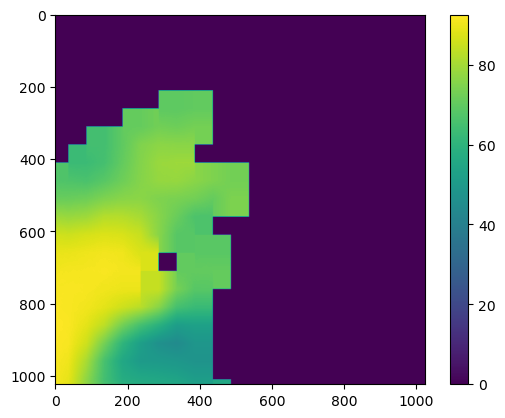

In [58]:
prova = sic.loc[24, 2007]
prova = np.where(prova > 100, 0, prova)

plt.imshow(prova)
plt.colorbar()

In [11]:
path_to_sic = '/Users/francesco/Desktop/sic_region_1.npy'
common_years = np.arange(2005,2017,1)
id = [1]
#load the sic
sic = np.load(path_to_sic, allow_pickle=True)
sic = pd.DataFrame(sic, index = id, columns = common_years)

In [20]:
path_to_bm = '/Users/francesco/Desktop/bm_region_1.npy'

bm = np.load(path_to_bm, allow_pickle=True)
bm = pd.DataFrame(bm, index = id, columns = common_years)

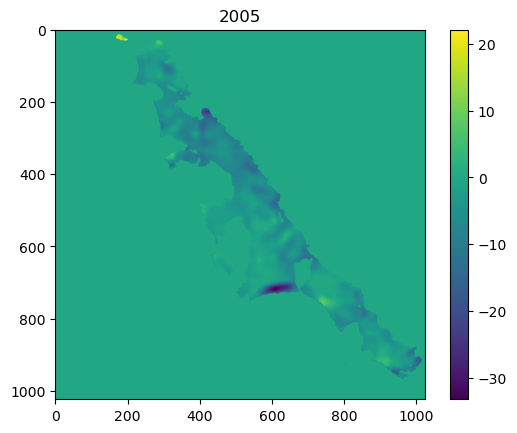

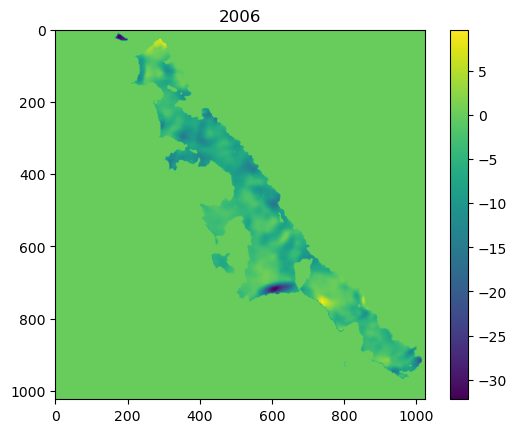

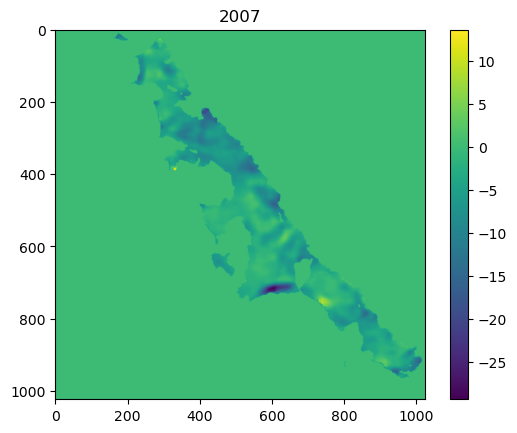

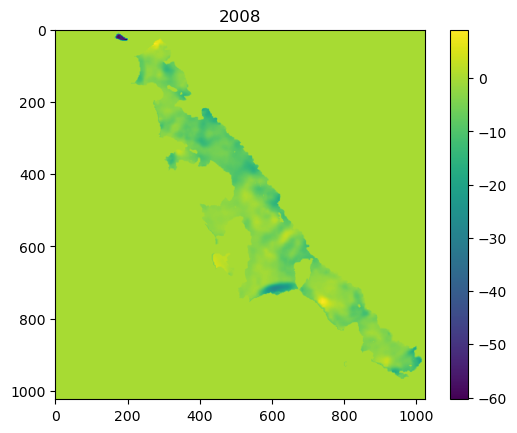

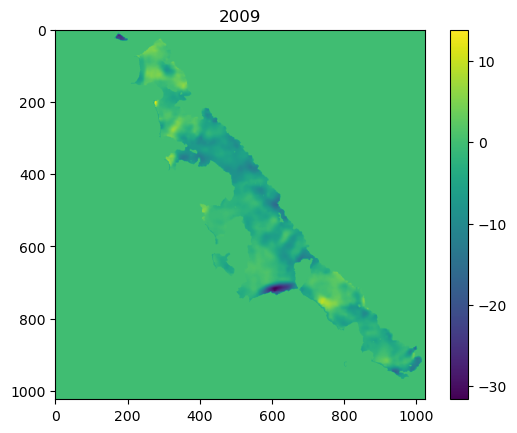

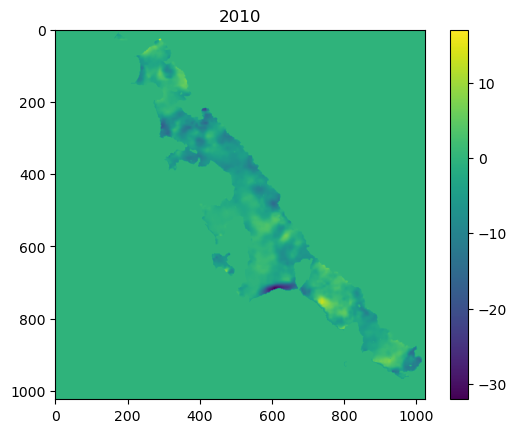

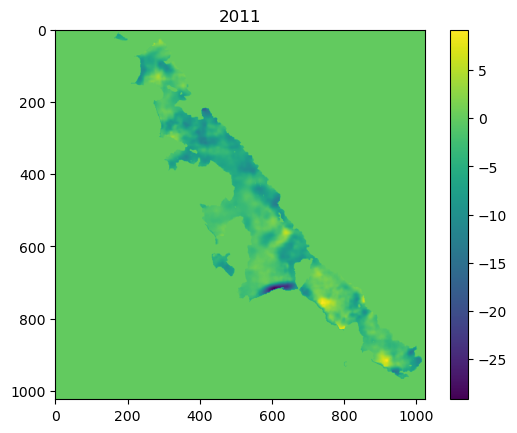

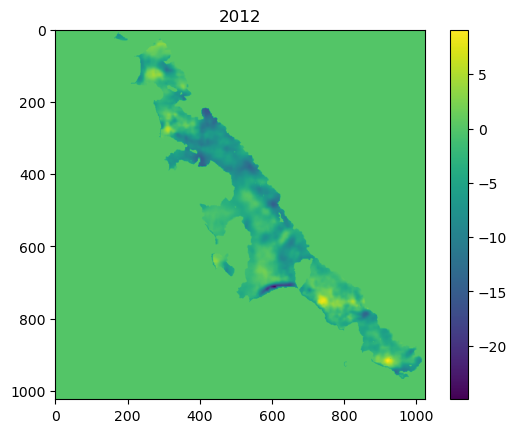

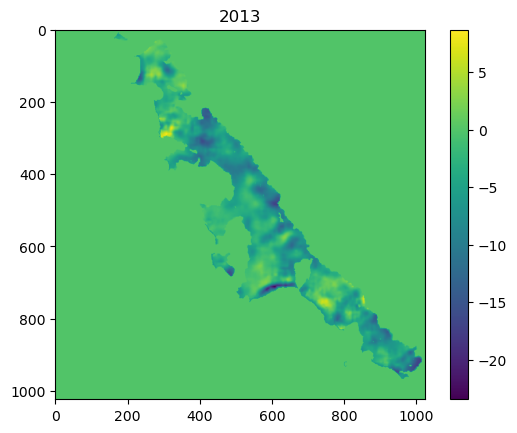

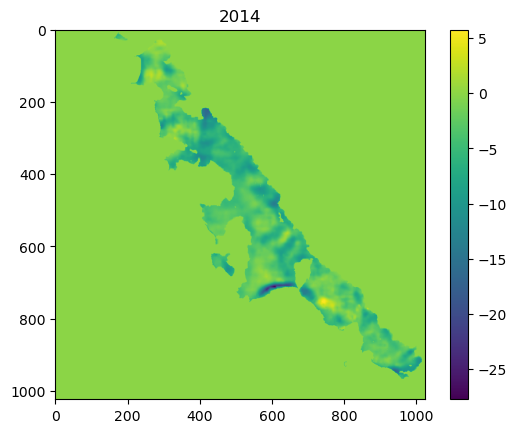

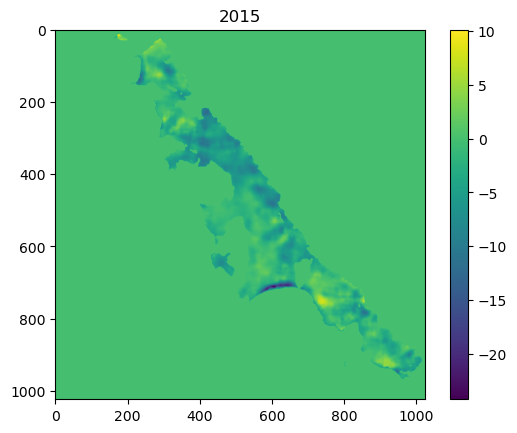

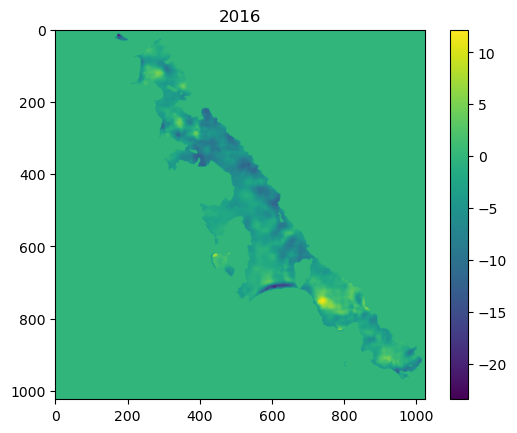

In [21]:
for year in common_years:
    plt.imshow(bm.loc[1, year])
    plt.colorbar()
    plt.title(year)
    plt.show()